In [21]:
import numpy as np
import matplotlib.pyplot as pl
import qnm_filter
from scipy.stats import multivariate_normal
from scipy.stats import chi2

In [22]:
pi = np.pi
target_percentile = 0.5

In [23]:
mass_space = np.linspace(-5, 5,int(3e2))
chi_space = np.linspace(-5, 5,int(3e2))

mass_grid, chi_grid = np.meshgrid(mass_space, chi_space)
total_grid = np.dstack((mass_grid, chi_grid))

In [24]:
var = multivariate_normal(mean=[0,0], cov=[[1,0],[0,1]])
pdf = var.pdf(total_grid)
ln_pdf = np.log(pdf)

In [25]:
grid_side = mass_space[1] - mass_space[0]
print("Is the pdf normalised: %r" % np.isclose(np.sum(pdf*grid_side**2),1))

Is the pdf normalised: True


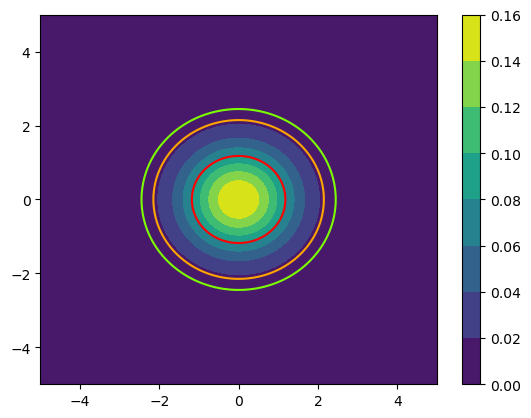

In [26]:
pl.contourf(mass_grid, chi_grid, pdf)
pl.colorbar()
pl.contour(mass_grid, chi_grid, pdf, [0.007975, 0.01586, 0.07956], colors = ['lawngreen', 'orange', 'r'])

In [27]:
temp_space = np.linspace(1, 8, int(1e4))
chi2_cdf = chi2.cdf(temp_space, 2)
quantile = temp_space[np.argmin(np.abs(chi2_cdf - target_percentile))]

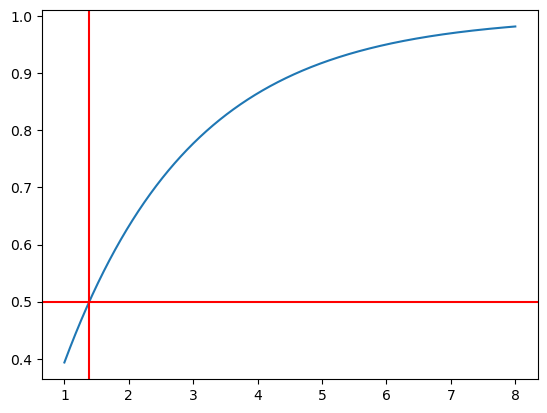

In [28]:
pl.plot(temp_space, chi2_cdf)
pl.axvline(quantile, c='r')
pl.axhline(target_percentile, c = 'r')

In [29]:
temp1_space = np.linspace(1, 5, int(1e4))
test_space = np.dstack((np.full(int(1e4), 0), temp1_space))

In [30]:
mean = [0,0]
cov = [[1,0],[0,1]]
distribution = [(i - mean).T@cov@(i-mean) for i in test_space.reshape(-1, test_space.shape[-1])]

In [31]:
axis_value = temp1_space[np.argmin(np.abs(distribution - quantile))]

In [32]:
pdf_value = var.pdf([0,axis_value])
print(np.sum(pdf[pdf>pdf_value])/np.sum(pdf))

0.5005773957297155


In [33]:
thresh_analytic = np.log(var.pdf([1,0]))

In [34]:
credible_region = qnm_filter.find_credible_region(ln_pdf, num_cpu=9, target_probability=target_percentile)

In [35]:
old_credible_region = qnm_filter.OLD_find_credible_region(ln_pdf, num_cpu=9, target_probability=target_percentile)

/home/neil/Dropbox/Ringdown/Codebase/qnm_filter/qnm_filter/utility.py:240: UserWarning: Cannot find the root, root distance was [8.61301074e-05] and so the         credible region estimate will be poor
  warnings.warn("Cannot find the root, root distance was {} and so the \


In [36]:
pdf_value

0.07955800801451873

In [37]:
np.e**(credible_region)

0.07961580133904227

In [38]:
np.e**(old_credible_region)[0] == np.e**(credible_region)

True

In [39]:
diff = np.abs((pdf_value-np.e**credible_region))
print("Difference between confidence and credible region is: %2f" % diff)
print("Percentage error is: %2f %%" % (100*diff/pdf_value))

Difference between confidence and credible region is: 0.000058
Percentage error is: 0.072643 %
